In [8]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import time
impt random

In [9]:
from sklearn.metrics import *
from sklearn.model_selection import *

In [10]:
data = pd.read_csv('train_jan06_task4bonus.csv')
data

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,class
0,6.627330,7.112929,3.180223,8.447526,11.775939,9.258543,13.059768,6.533169,6.571047,2.246224,3.154824,4.275603,4.254149,5.925909,A
1,6.543755,4.788466,4.820736,NaN,8.912941,4.417455,6.669731,6.449049,6.017327,NaN,6.184168,1.465625,4.846661,4.909728,A
2,10.763393,9.627771,5.366717,11.069963,10.513944,17.697342,NaN,9.009726,2.305709,NaN,NaN,2.110014,4.705341,6.084535,A
3,2.213675,6.762653,5.485250,8.297805,13.656057,6.781330,12.910187,7.239285,4.402563,0.431484,3.637590,1.909670,6.900005,4.672976,A
4,5.880715,5.873137,6.619697,6.585317,12.377196,NaN,11.921150,9.911084,3.375915,3.285773,2.061589,NaN,6.819546,5.244592,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,2.115175,3.556323,5.400850,4.894259,12.219244,13.625420,14.491930,NaN,6.488044,3.026747,2.919862,6.274653,3.560418,6.371444,D
6496,NaN,1.572717,4.934577,6.762989,16.595096,9.077770,15.688522,6.779613,3.744388,10.997901,5.508645,NaN,6.293039,NaN,D
6497,6.730751,6.401538,NaN,3.885675,13.124994,11.603835,17.259100,9.730964,6.063767,1.255145,3.794066,3.007388,6.600750,5.369780,D
6498,2.850777,8.453435,6.618376,3.680947,13.669807,9.513230,11.719776,3.514721,8.169909,9.060299,0.761762,2.631576,3.538176,4.955969,D


In [11]:
missing_value_count = data.isnull().sum()
missing_value_count[0:14]

feature0     415
feature1     393
feature2     397
feature3     368
feature4     410
feature5     409
feature6     396
feature7     341
feature8     372
feature9     433
feature10    422
feature11    403
feature12    409
feature13    414
dtype: int64

In [7]:
print(y.value_counts())
y

C    2500
B    2000
A    1000
D    1000
Name: class, dtype: int64


0       A
1       A
2       A
3       A
4       A
       ..
6495    D
6496    D
6497    D
6498    D
6499    D
Name: class, Length: 6500, dtype: object

A    2500
B    2500
C    2500
D    2500
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

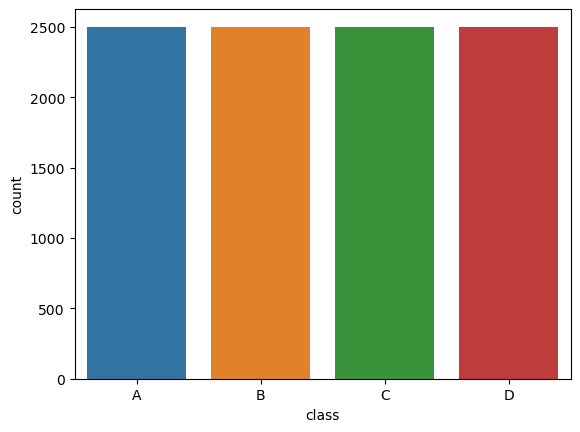

In [8]:
from imblearn.over_sampling import SMOTE
x,y = SMOTE().fit_resample(x,y)
print(y.value_counts())
sns.countplot(x = y)

In [9]:
print(x.value_counts())

feature0   feature1   feature2   feature3  feature4   feature5   feature6   feature7   feature8   feature9   feature10  feature11  feature12  feature13
0.058993   7.143987   10.677338  4.921126  10.071339  9.983798   23.672617  1.799263   9.691426   7.275190   1.395025   2.545155   4.433007   5.770651     1
7.265406   6.615967   7.856335   5.363568  8.928914   17.727339  7.676298   5.371139   2.962353   3.568053   3.821267   3.128418   5.237079   5.907963     1
7.262279   5.489325   6.469831   6.450217  8.884291   8.293923   8.356400   7.517080   7.310672   6.658386   2.913812   0.672944   5.562389   5.759698     1
7.262584   9.300467   4.636277   6.137814  11.460013  9.933087   8.975084   9.936363   4.536182   7.580674   1.269618   5.763999   3.642979   4.144478     1
7.264043   5.038365   5.859469   9.269189  10.717892  6.480832   7.844992   7.646617   9.051450   3.607886   3.112847   2.282692   4.914381   4.133052     1
                                                               

In [10]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif, mutual_info_classif

#  Selecting Top 10 Best Features using SelectKBest class
kf = SelectKBest(score_func=f_classif, k=10)
km = SelectKBest(score_func=mutual_info_classif, k=10)

# Run score function on (X, y) and get the appropriate features.
kf_fit = kf.fit(x,y)
km_fit = km.fit(x,y)

kf_scores = pd.DataFrame(kf_fit.scores_)  # Scores of features.
km_scores = pd.DataFrame(km_fit.scores_)  # Scores of features.
X_columns = pd.DataFrame(x.columns)

# Combine dataframes ... 
featureScores = pd.concat([X_columns, kf_scores, km_scores], axis=1)
# Naming the dataframe's columns ...
featureScores.columns = ['Features', 'f-test_Scores', 'mutual_info_scores'] 
featureScores

,Features,f-test_Scores,mutual_info_scores
0,feature0,3.058448,0.016701
1,feature1,0.949759,0.017887
2,feature2,1847.423797,0.242343
3,feature3,1886.767437,0.247164
4,feature4,1294.204118,0.207040
5,feature5,851.483736,0.133167
6,feature6,684.812031,0.144426
7,feature7,0.030771,0.010757
8,feature8,1.649856,0.007024
9,feature9,4.025825,0.009352


<Figure size 1000x2000 with 0 Axes>

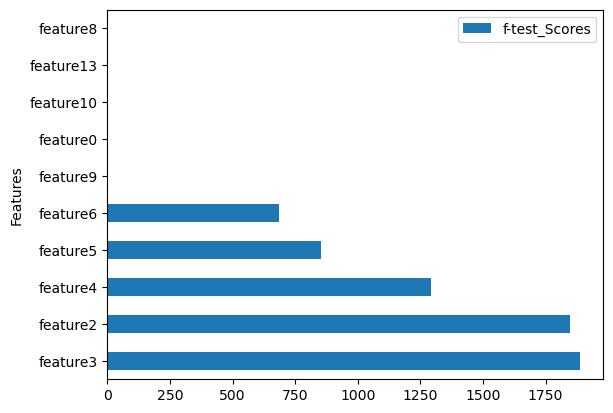

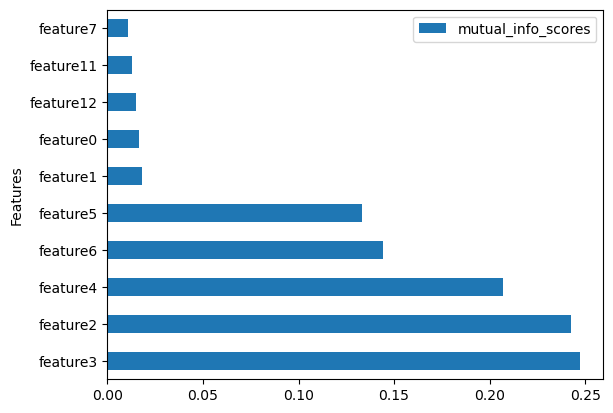

In [11]:
plt.figure(1, figsize=(10, 20))
for i in range(2):
    fs = featureScores.columns[i+1]
    best_features = featureScores.nlargest(10, fs)[['Features', fs]]
    best_features.plot.barh('Features'); 

In [14]:
x_features = x[['feature3','feature2','feature4','feature5','feature6','feature1','feature0','feature12','feature11','feature7']]

In [19]:
x1, x2, y1, y2 = train_test_split(x_features, y, random_state=42, train_size=0.8, test_size=0.2)

In [20]:
from xgboost import XGBClassifier
model2= XGBClassifier()
model2.fit(x1,y1)
y_hat_2 = model2.predict(x2)
print(y_hat_2)
print(accuracy_score(y2,y_hat_2))

C:\Users\88690\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\88690\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[09:27:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['D' 'C' 'B' ... 'D' 'A' 'A']
0.804


In [21]:
data_test = pd.read_csv('test_jan06_task4bonus.csv')
data_test

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
0,7.958822,4.921682,8.403773,4.438126,9.941840,11.540108,32.079090,3.131990,6.484440,9.151389,5.246794,0.004620,5.205651,3.913730
1,3.129962,7.559769,9.615438,4.724490,14.219679,12.290087,10.906962,2.828823,6.465006,2.930129,3.723155,0.009532,4.272198,6.683308
2,8.361629,9.401642,8.535803,4.479435,12.752660,13.737146,10.233271,4.221104,6.470115,1.246738,3.705131,0.013113,6.214157,4.266515
3,7.276123,5.842576,5.256950,6.522724,14.078039,15.495807,11.198456,11.878643,6.573373,3.920268,2.179727,0.013641,4.510092,6.557853
4,5.128291,2.722094,9.446527,3.952257,12.139716,11.430807,12.431376,3.075474,6.442112,9.696617,5.535012,0.016902,4.361405,5.034558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,NaN,2.681023,8.126562,4.402689,12.699052,8.498063,8.621546,5.942451,5.952262,10.058843,0.123059,NaN,3.585961,6.367371
1596,10.948451,6.739809,3.700628,6.519499,15.785253,10.483431,15.562500,4.077413,2.133051,6.693121,4.754250,NaN,4.614752,4.998292
1597,4.990887,5.235681,3.435176,4.103357,14.784948,11.544956,11.398968,5.009709,5.921049,2.904881,2.684932,NaN,4.005569,3.625773
1598,10.065261,1.340424,5.314999,5.254424,10.981572,7.115388,14.078901,5.301632,6.482795,2.887953,2.931331,NaN,3.693389,5.742209


In [22]:
x_final = data_test
missing_value_count = x_final.isnull().sum()
missing_value_count[0:14]
for i in x_final.columns:
    x_final[i].fillna(x_final[i].median(),inplace=True)
x_final


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
0,7.958822,4.921682,8.403773,4.438126,9.941840,11.540108,32.079090,3.131990,6.484440,9.151389,5.246794,0.004620,5.205651,3.913730
1,3.129962,7.559769,9.615438,4.724490,14.219679,12.290087,10.906962,2.828823,6.465006,2.930129,3.723155,0.009532,4.272198,6.683308
2,8.361629,9.401642,8.535803,4.479435,12.752660,13.737146,10.233271,4.221104,6.470115,1.246738,3.705131,0.013113,6.214157,4.266515
3,7.276123,5.842576,5.256950,6.522724,14.078039,15.495807,11.198456,11.878643,6.573373,3.920268,2.179727,0.013641,4.510092,6.557853
4,5.128291,2.722094,9.446527,3.952257,12.139716,11.430807,12.431376,3.075474,6.442112,9.696617,5.535012,0.016902,4.361405,5.034558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.250950,2.681023,8.126562,4.402689,12.699052,8.498063,8.621546,5.942451,5.952262,10.058843,0.123059,3.134718,3.585961,6.367371
1596,10.948451,6.739809,3.700628,6.519499,15.785253,10.483431,15.562500,4.077413,2.133051,6.693121,4.754250,3.134718,4.614752,4.998292
1597,4.990887,5.235681,3.435176,4.103357,14.784948,11.544956,11.398968,5.009709,5.921049,2.904881,2.684932,3.134718,4.005569,3.625773
1598,10.065261,1.340424,5.314999,5.254424,10.981572,7.115388,14.078901,5.301632,6.482795,2.887953,2.931331,3.134718,3.693389,5.742209


In [23]:
x_features = x_final[['feature3','feature2','feature4','feature5','feature6','feature10','feature11','feature0','feature9','feature7']]

In [24]:
from xgboost import XGBClassifier
model2= XGBClassifier()
model2.fit(x1,y1)
y_hat_3 = model2.predict(x_features)
print(y_hat_3)

C:\Users\88690\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\88690\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[09:27:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['C' 'C' 'B' ... 'D' 'C' 'C']


In [25]:
import csv
with open('output_task4bonus_median.csv', 'w', newline='') as csvfile:
  
    writer = csv.writer(csvfile)

    writer.writerow(['Id', 'Category'])

    for i in range(len(y_hat_3)):
        writer.writerow([i + 1, y_hat_3[i]])